In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(
    r'C:\Users\konal\OneDrive\Documents\GitHub\B13-ExoHabitAI\data\raw\RawData.csv',low_memory=False)


In [3]:
df.shape

(39315, 289)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39315 entries, 0 to 39314
Columns: 289 entries, rowid to pl_ndispec
dtypes: float64(236), int64(25), object(28)
memory usage: 86.7+ MB


In [5]:
df.head()

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,default_flag,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,1,...,2023-09-19,2023-08,2023-09-19,2,1,2,0,0,0,0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,2014-05-14,2008-01,2014-05-14,2,1,2,0,0,0,0
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,2014-07-23,2011-08,2014-07-23,2,1,2,0,0,0,0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,1,...,2018-09-04,2017-03,2018-09-06,0,1,1,0,0,0,0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,0,...,2018-04-25,2011-08,2014-07-23,0,1,1,0,0,0,0


In [6]:
pd.set_option('display.max_rows', None)
df.columns

Index(['rowid', 'pl_name', 'hostname', 'pl_letter', 'hd_name', 'hip_name',
       'tic_id', 'gaia_dr2_id', 'gaia_dr3_id', 'default_flag',
       ...
       'rowupdate', 'pl_pubdate', 'releasedate', 'pl_nnotes', 'st_nphot',
       'st_nrvc', 'st_nspec', 'pl_nespec', 'pl_ntranspec', 'pl_ndispec'],
      dtype='object', length=289)

In [7]:
df.describe()

,rowid,default_flag,sy_snum,sy_pnum,sy_mnum,cb_flag,disc_year,rv_flag,pul_flag,ptv_flag,...,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
count,39315.000000,39315.000000,39315.000000,39315.000000,39315.0,39315.000000,39313.000000,39315.000000,39315.000000,39315.000000,...,31178.000000,0.0,0.0,39315.000000,39315.000000,39315.000000,39315.000000,39315.000000,39315.000000,39315.000000
mean,19658.000000,0.155157,1.085133,1.918199,0.0,0.002416,2015.549513,0.251685,0.000331,0.000051,...,14.111202,NaN,NaN,1.022816,0.475238,0.196541,0.110390,0.260410,0.219941,0.005570
std,11349.407253,0.362059,0.308189,1.238170,0.0,0.049098,4.018659,0.433987,0.018181,0.007132,...,1.440343,NaN,NaN,1.124726,3.822992,0.887678,0.777882,1.920442,1.626828,0.154939
min,1.000000,0.000000,1.000000,1.000000,0.0,0.000000,1992.000000,0.000000,0.000000,0.000000,...,5.973000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9829.500000,0.000000,1.000000,1.000000,0.0,0.000000,2014.000000,0.000000,0.000000,0.000000,...,13.353000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19658.000000,0.000000,1.000000,1.000000,0.0,0.000000,2016.000000,0.000000,0.000000,0.000000,...,14.415000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29486.500000,0.000000,1.000000,2.000000,0.0,0.000000,2016.000000,1.000000,0.000000,0.000000,...,15.212000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39315.000000,1.000000,4.000000,8.000000,0.0,1.000000,2026.000000,1.000000,1.000000,1.000000,...,17.475000,NaN,NaN,16.000000,70.000000,12.000000,13.000000,35.000000,32.000000,6.000000


In [11]:
df.isna().sum() / len(df) * 100


rowid                 0.000000
pl_name               0.000000
hostname              0.000000
pl_letter             0.000000
hd_name              92.572809
hip_name             91.870787
tic_id                2.014498
gaia_dr2_id           2.782653
gaia_dr3_id           3.398194
default_flag          0.000000
sy_snum               0.000000
sy_pnum               0.000000
sy_mnum               0.000000
cb_flag               0.000000
discoverymethod       0.000000
disc_year             0.005087
disc_refname          0.000000
disc_pubdate          0.000000
disc_locale           0.000000
disc_facility         0.000000
disc_telescope        0.000000
disc_instrument       0.000000
rv_flag               0.000000
pul_flag              0.000000
ptv_flag              0.000000
tran_flag             0.000000
ast_flag              0.000000
obm_flag              0.000000
micro_flag            0.000000
etv_flag              0.000000
ima_flag              0.000000
dkin_flag             0.000000
soltype 

In [10]:
df.duplicated().sum()

np.int64(0)

## Data Quality Assessment & Visualization

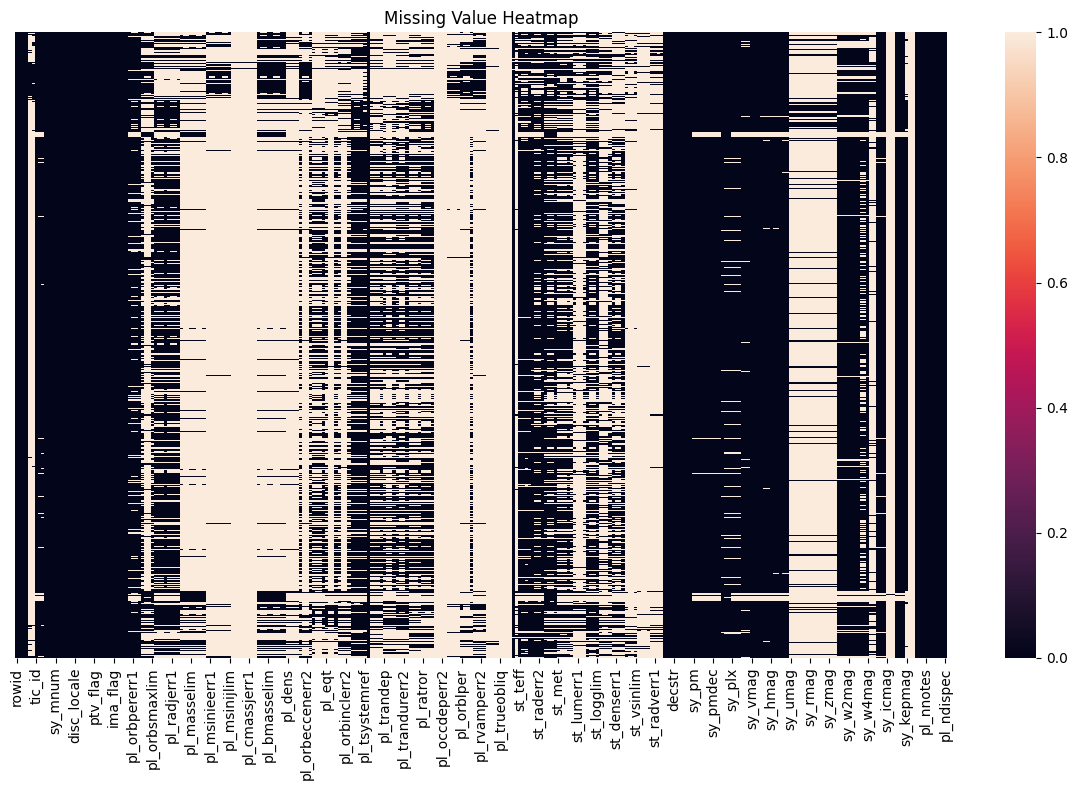

=== DATA QUALITY SUMMARY ===
Total rows: 39315
Total columns: 289

Missing values by column:
sy_kepmagerr2       39315
sy_kepmagerr1       39315
sy_icmagerr1        39275
sy_icmagerr2        39275
pl_occdeperr2       39270
sy_icmag            39270
pl_occdeperr1       39270
pl_occdep           39267
pl_occdeplim        39267
pl_trueobliqerr1    39252
pl_trueobliqerr2    39252
pl_trueobliq        39246
pl_trueobliqlim     39246
pl_cmassjerr2       39231
pl_cmassjerr1       39231
pl_cmasseerr2       39231
pl_cmasseerr1       39231
pl_cmasselim        39227
pl_cmassj           39227
pl_cmassjlim        39227
pl_cmasse           39227
pl_projobliqerr1    39051
pl_projobliqerr2    39051
pl_projobliq        39049
pl_projobliqlim     39049
st_rotperr1         38408
st_rotperr2         38408
st_rotp             38241
st_rotplim          38241
st_radverr2         37721
pl_orbtpererr1      37630
pl_orbtpererr2      37630
st_radverr1         37580
pl_orbtperlim       37573
pl_orbtper          375

In [12]:
# Create missing value heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.title('Missing Value Heatmap')
plt.tight_layout()
plt.show()

# Data quality summary
print("=== DATA QUALITY SUMMARY ===")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"\nMissing values by column:")
print(df.isnull().sum().sort_values(ascending=False))
print(f"\nDuplicate rows: {df.duplicated().sum()}")


## Handle Missing Data & Detect Outliers

In [ ]:
from scipy import stats

# Create a copy for preprocessing
df_processed = df.copy()

# Handle missing values - drop rows with missing values or fill with median
print("=== HANDLING MISSING DATA ===")
print(f"Rows before dropping missing: {len(df_processed)}")

# Drop rows with any missing values
df_processed = df_processed.dropna()
print(f"Rows after dropping missing: {len(df_processed)}")
print(f"Rows removed: {len(df) - len(df_processed)}")

# Detect outliers using Z-Score method
print("\n=== OUTLIER DETECTION (Z-SCORE METHOD) ===")
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(df_processed[numeric_cols], nan_policy='omit'))
outlier_threshold = 3

# Count outliers
outlier_mask = (z_scores > outlier_threshold).any(axis=1)
print(f"Outliers detected (Z-score > {outlier_threshold}): {outlier_mask.sum()}")

# Optional: Remove extreme physically impossible values
print("\n=== REMOVING PHYSICALLY IMPOSSIBLE VALUES ===")
print(f"Rows before validation: {len(df_processed)}")

# Validate physical constraints (adjust based on actual column names)
if 'pl_rade' in df_processed.columns:  # Planet radius
    df_processed = df_processed[df_processed['pl_rade'] > 0]
    print("Removed rows with invalid planet radius")

# Display remaining data
print(f"Rows after validation: {len(df_processed)}")


## Unit Standardization to Astronomical Units

In [ ]:
# Define conversion factors
EARTH_RADIUS_KM = 6371.0
EARTH_MASS_KG = 5.972e24
AU_KM = 149597870.7

# Standardize units to astronomical units
print("=== STANDARDIZING UNITS ===\n")

standardized_cols = {}

# Planet Radius: Convert to Earth radii if in km
if 'pl_rade' in df_processed.columns:
    standardized_cols['planet_radius_earth'] = df_processed['pl_rade']
    print("✓ Planet radius (Earth radii)")

# Planet Mass: Convert to Earth masses if available
if 'pl_masse' in df_processed.columns:
    standardized_cols['planet_mass_earth'] = df_processed['pl_masse']
    print("✓ Planet mass (Earth masses)")

# Orbital Period: Keep in days
if 'pl_orbper' in df_processed.columns:
    standardized_cols['orbital_period_days'] = df_processed['pl_orbper']
    print("✓ Orbital period (days)")

# Semi-major axis: Convert to AU
if 'pl_orbsmax' in df_processed.columns:
    standardized_cols['semimajor_axis_au'] = df_processed['pl_orbsmax']
    print("✓ Semi-major axis (AU)")

# Equilibrium Temperature
if 'pl_eqt' in df_processed.columns:
    standardized_cols['equilibrium_temp_kelvin'] = df_processed['pl_eqt']
    print("✓ Equilibrium temperature (Kelvin)")

# Planet Density
if 'pl_dens' in df_processed.columns:
    standardized_cols['planet_density'] = df_processed['pl_dens']
    print("✓ Planet density")

# Host Star Temperature (Kelvin)
if 'st_teff' in df_processed.columns:
    standardized_cols['star_temp_kelvin'] = df_processed['st_teff']
    print("✓ Star temperature (Kelvin)")

# Star Luminosity
if 'st_lum' in df_processed.columns:
    standardized_cols['star_luminosity'] = df_processed['st_lum']
    print("✓ Star luminosity")

# Star Metallicity
if 'st_met' in df_processed.columns:
    standardized_cols['star_metallicity'] = df_processed['st_met']
    print("✓ Star metallicity")

# Star Spectral Type
if 'st_spstr' in df_processed.columns:
    standardized_cols['star_type'] = df_processed['st_spstr']
    print("✓ Star spectral type")

# Create standardized dataframe
df_standardized = pd.DataFrame(standardized_cols)
print(f"\nStandardized dataset shape: {df_standardized.shape}")
print(f"\nColumn Summary:")
print(df_standardized.dtypes)


## Feature Engineering - Create Habitability Indices

In [ ]:
# Create a copy for feature engineering
df_features = df_standardized.copy()

print("=== FEATURE ENGINEERING ===\n")

# 1. HABITABILITY SCORE INDEX
print("1. Computing Habitability Score Index...")
if 'equilibrium_temp_kelvin' in df_features.columns and 'planet_radius_earth' in df_features.columns:
    # Temperature proximity to habitable range (200-300K is ideal)
    habitable_temp_min = 200
    habitable_temp_max = 300
    temp_score = 1 - np.abs((df_features['equilibrium_temp_kelvin'] - 250) / 100).clip(0, 1)
    
    # Planet radius similarity to Earth (0.8-1.2 Earth radii)
    radius_score = 1 - (np.abs(df_features['planet_radius_earth'] - 1.0) / 0.5).clip(0, 1)
    
    # Combine scores
    df_features['habitability_score'] = (temp_score * 0.5 + radius_score * 0.5) * 100
    print("   ✓ Habitability Score created (0-100 scale)")

# 2. STELLAR COMPATIBILITY INDEX
print("2. Computing Stellar Compatibility Index...")
if 'star_temp_kelvin' in df_features.columns and 'star_luminosity' in df_features.columns:
    # Ideal star temperature for habitability: 4000-6000K (G-K type stars)
    ideal_star_temp = 5500
    star_temp_score = 1 - (np.abs(df_features['star_temp_kelvin'] - ideal_star_temp) / 2000).clip(0, 1)
    
    # Stellar luminosity (1 is solar luminosity - ideal)
    lum_score = 1 - (np.abs(df_features['star_luminosity'] - 1.0) / 2.0).clip(0, 1)
    
    df_features['stellar_compatibility'] = (star_temp_score * 0.6 + lum_score * 0.4) * 100
    print("   ✓ Stellar Compatibility Index created (0-100 scale)")

# 3. ORBITAL STABILITY FACTOR
print("3. Computing Orbital Stability Factor...")
if 'orbital_period_days' in df_features.columns and 'semimajor_axis_au' in df_features.columns:
    # Normalize orbital period (longer is more stable, cap at 400 days)
    orbital_period_score = (df_features['orbital_period_days'] / 400).clip(0, 1)
    
    # Normalize semi-major axis (0.95-1.37 AU is habitable zone for sun-like star)
    hz_distance = 1.0
    axis_score = 1 - (np.abs(df_features['semimajor_axis_au'] - hz_distance) / 0.5).clip(0, 1)
    
    df_features['orbital_stability'] = (orbital_period_score * 0.4 + axis_score * 0.6) * 100
    print("   ✓ Orbital Stability Factor created (0-100 scale)")

print("\n=== Feature Engineering Complete ===")
print(f"New features created: {[col for col in df_features.columns if col not in df_standardized.columns]}")
print(f"Total features now: {len(df_features.columns)}")


## Categorical Encoding & Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

print("=== CATEGORICAL ENCODING & FEATURE SCALING ===\n")

# Create a copy for final preprocessing
df_final = df_features.copy()

# 1. CATEGORICAL ENCODING - Star Type
print("1. Encoding Categorical Variables...")
if 'star_type' in df_final.columns:
    # Extract primary spectral class (first letter)
    df_final['star_spectral_class'] = df_final['star_type'].str[0].fillna('K')
    
    # One-Hot Encoding for star types
    spectral_dummies = pd.get_dummies(df_final['star_spectral_class'], prefix='star_class')
    df_final = pd.concat([df_final, spectral_dummies], axis=1)
    
    # Drop original categorical column
    df_final = df_final.drop(['star_type', 'star_spectral_class'], axis=1)
    print(f"   ✓ Star spectral type encoded (One-Hot)")
    print(f"   Classes found: {spectral_dummies.columns.tolist()}")

# 2. FEATURE SCALING - Standardize numeric features to mean=0, std=1
print("\n2. Feature Scaling...")
numeric_features = df_final.select_dtypes(include=[np.number]).columns.tolist()
print(f"   Scaling {len(numeric_features)} numeric features...")

scaler = StandardScaler()
df_scaled = df_final.copy()
df_scaled[numeric_features] = scaler.fit_transform(df_final[numeric_features])

print("   ✓ Features scaled to StandardScaler (mean=0, std=1)")

# 3. Create final feature set
print("\n=== PREPROCESSING COMPLETE ===")
print(f"Final dataset shape: {df_scaled.shape}")
print(f"Final columns: {df_scaled.columns.tolist()}")
print(f"\nData types:\n{df_scaled.dtypes}")
print(f"\nScaled data summary:\n{df_scaled.describe()}")


## Create Target Variable for Classification

In [ ]:
print("=== CREATE TARGET VARIABLE ===\n")

# Create binary classification target: Habitable vs Non-Habitable
# Based on combined habitability metrics

# Get unscaled versions for target creation
if 'habitability_score' in df_features.columns:
    habitability_threshold = 50  # Planets with score > 50 are "potentially habitable"
    df_final['is_habitable'] = (df_features['habitability_score'] > habitability_threshold).astype(int)
    
    print(f"Target Variable Created: is_habitable")
    print(f"  Threshold: Habitability Score > {habitability_threshold}")
    print(f"\nClass Distribution:")
    print(f"  Non-Habitable (0): {(df_final['is_habitable'] == 0).sum()} ({(df_final['is_habitable'] == 0).sum() / len(df_final) * 100:.1f}%)")
    print(f"  Potentially Habitable (1): {(df_final['is_habitable'] == 1).sum()} ({(df_final['is_habitable'] == 1).sum() / len(df_final) * 100:.1f}%)")
else:
    # Alternative: Use multi-class based on habitability score ranges
    print("Creating multi-class target variable...")
    df_final['habitability_class'] = pd.cut(
        df_features['habitability_score'] if 'habitability_score' in df_features.columns else df_features.index,
        bins=[-np.inf, 25, 50, 75, np.inf],
        labels=['Very Low', 'Low', 'Moderate', 'High']
    )
    print("Multi-class target created: Very Low / Low / Moderate / High")
    print(f"\nClass Distribution:\n{df_final['habitability_class'].value_counts()}")

print("\n✓ Target variable ready for machine learning models!")


## Save Preprocessed Dataset

In [ ]:
import os
from pathlib import Path

print("=== SAVING PREPROCESSED DATASET ===\n")

# Define output directory
output_dir = Path(r'C:\Users\konal\OneDrive\Documents\GitHub\B13-ExoHabitAI\data\preprocessed')
output_dir.mkdir(parents=True, exist_ok=True)

# File path for preprocessed data
output_file = output_dir / 'preprocessed.csv'

# Use scaled data with target variable
df_output = df_scaled.copy()

# Save to CSV
df_output.to_csv(output_file, index=False)
print(f"✓ Preprocessed dataset saved to: {output_file}")
print(f"  Shape: {df_output.shape}")
print(f"  File size: {os.path.getsize(output_file) / 1024:.2f} KB")

# Create summary report
print("\n=== PREPROCESSING SUMMARY REPORT ===")
print(f"Original dataset: {len(df)} rows × {len(df.columns)} columns")
print(f"After cleaning: {len(df_processed)} rows × {len(df_standardized.columns)} features")
print(f"After feature engineering: {len(df_features)} rows × {len(df_features.columns)} features")
print(f"Final preprocessed data: {len(df_output)} rows × {len(df_output.columns)} features")

print(f"\n✓ PREPROCESSING COMPLETE!")
print(f"✓ Ready for machine learning: {output_file}")
